In [1]:
## importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import cv2

random.seed(0)

# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [3]:
#Convert to grayscale 

def grayscale(image):

    array_shape = image.shape[0:3]
    dim = np.empty(array_shape + (1,))
    dim[:, :, : ,0] = 0.114 * image[:, :, :, 0] + 0.587 * image[:, :, :, 1] + 0.299 * image[:, :, :, 2]
    
    return dim
    


In [4]:
X_train_gray = grayscale(X_train)
X_valid_gray = grayscale(X_valid)
X_test_gray  = grayscale(X_test)



array([[29, 29, 30, ..., 31, 31, 32],
       [27, 27, 28, ..., 31, 32, 33],
       [27, 28, 29, ..., 32, 32, 33],
       ...,
       [28, 29, 31, ..., 29, 28, 28],
       [27, 28, 30, ..., 28, 27, 28],
       [29, 28, 29, ..., 29, 28, 30]], dtype=uint8)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of validation examples
n_validation = y_valid.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's theshape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(np.concatenate([y_test, y_train, y_valid], axis = 0)))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [7]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.`
%matplotlib inline


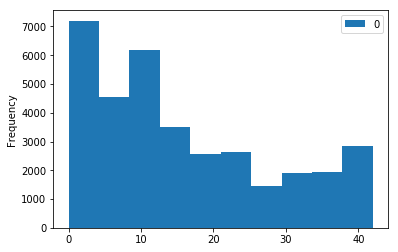

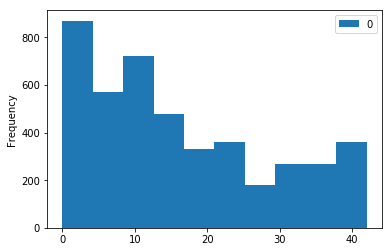

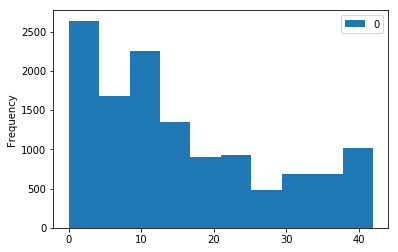

In [8]:
df_train = pd.DataFrame(y_train)
df_valid = pd.DataFrame(y_valid)
df_test  = pd.DataFrame(y_test)
df_train.plot.hist()
df_valid.plot.hist()
df_test.plot.hist()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

#Preprocessing to normalize to mean zero and equal variance
def normalize(image_data):
    x_mean = 128
    return (image_data - np.ones(image_data.shape)*x_mean)/(x_mean*2)
    #return (image_data)/x_mean - np.ones(image_data.shape)*0.5
    
X_train_1 = normalize(X_train)
X_valid_1 = normalize(X_valid)
X_test_1  = normalize(X_test)


/home/lhy/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
X_train_gray_1 = normalize(X_train_gray)
X_valid_gray_1 = normalize(X_valid_gray)
X_test_gray_1  = normalize(X_test_gray)

### Model Architecture

In [8]:
   keep_prob = tf.placeholder_with_default(1.0, shape=())

In [31]:
## use lenet architecture first

#from tensorflow.contrib.layers import flatten

def LeNet_gray(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 1.0
    

    #keep_prob = tf.placeholder_with_default(1.0, shape=())
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, conv1_b)
    
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID')
    conv2   = tf.nn.bias_add(conv2, conv2_b)
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 256.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(5*5*16, 256), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(256))
    fc1   = tf.matmul(fc0, fc1_W)
    fc1   = tf.nn.bias_add(fc1, fc1_b)
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 256. Output = 120
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(256, 120), mean = mu, stddev = 0.1))
    fc2_b  = tf.Variable(tf.zeros(120))
    fc2    = tf.matmul(fc1, fc2_W)
    fc2    = tf.nn.bias_add(fc2, fc2_b)
    
    # SOLUTION: Activation and dropout
    fc2    = tf.nn.relu(fc2)
    
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 120. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, n_classes), mean = mu, stddev = 0.1))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    fc3 = tf.matmul(fc2, fc3_W) 
    logits = tf.nn.bias_add(fc3, fc3_b)
    
    return logits

print("lenet gray done")

lenet gray done


In [32]:
tf.set_random_seed(0)

In [33]:
#Features and labels

x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], 1))
y = tf.placeholder(tf.int64, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder_with_default(1.0, shape = ())


print('gray labels done')


gray labels done


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [37]:
#training pipeline
EPOCHS = 200
BATCH_SIZE = 128
rate = 0.001

logits = LeNet_gray(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
#cross_entropy = tf.losses.sparse_softmax_cross_entropy(labels=y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [38]:
#evaluation 

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
#correct_prediction = tf.equal(tf.argmax(logits, 1), y)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [39]:
#model training in progress

with tf.Session() as sess_gray:
    sess_gray.run(tf.global_variables_initializer())
    num_examples = len(X_train_1)
    
    print("Training...")
    print()
    for i in range(EPOCHS*7):
 #       X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_gray_1[offset:end], y_train[offset:end]
            sess_gray.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
        
        validation_accuracy = evaluate(X_valid_gray_1, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess_gray, './lenet_gray')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.049

EPOCH 2 ...
Validation Accuracy = 0.048

EPOCH 3 ...
Validation Accuracy = 0.059

EPOCH 4 ...
Validation Accuracy = 0.060

EPOCH 5 ...
Validation Accuracy = 0.066

EPOCH 6 ...
Validation Accuracy = 0.065

EPOCH 7 ...
Validation Accuracy = 0.071

EPOCH 8 ...
Validation Accuracy = 0.067

EPOCH 9 ...
Validation Accuracy = 0.081

EPOCH 10 ...
Validation Accuracy = 0.085

EPOCH 11 ...
Validation Accuracy = 0.083

EPOCH 12 ...
Validation Accuracy = 0.090

EPOCH 13 ...
Validation Accuracy = 0.095

EPOCH 14 ...
Validation Accuracy = 0.090

EPOCH 15 ...
Validation Accuracy = 0.090

EPOCH 16 ...
Validation Accuracy = 0.116

EPOCH 17 ...
Validation Accuracy = 0.103

EPOCH 18 ...
Validation Accuracy = 0.111

EPOCH 19 ...
Validation Accuracy = 0.110

EPOCH 20 ...
Validation Accuracy = 0.111

EPOCH 21 ...
Validation Accuracy = 0.146

EPOCH 22 ...
Validation Accuracy = 0.129

EPOCH 23 ...
Validation Accuracy = 0.130

EPOCH 24 ...
Validation Accura

EPOCH 194 ...
Validation Accuracy = 0.749

EPOCH 195 ...
Validation Accuracy = 0.775

EPOCH 196 ...
Validation Accuracy = 0.733

EPOCH 197 ...
Validation Accuracy = 0.751

EPOCH 198 ...
Validation Accuracy = 0.748

EPOCH 199 ...
Validation Accuracy = 0.745

EPOCH 200 ...
Validation Accuracy = 0.739

EPOCH 201 ...
Validation Accuracy = 0.759

EPOCH 202 ...
Validation Accuracy = 0.758

EPOCH 203 ...
Validation Accuracy = 0.780

EPOCH 204 ...
Validation Accuracy = 0.787

EPOCH 205 ...
Validation Accuracy = 0.775

EPOCH 206 ...
Validation Accuracy = 0.764

EPOCH 207 ...
Validation Accuracy = 0.795

EPOCH 208 ...
Validation Accuracy = 0.779

EPOCH 209 ...
Validation Accuracy = 0.785

EPOCH 210 ...
Validation Accuracy = 0.793

EPOCH 211 ...
Validation Accuracy = 0.779

EPOCH 212 ...
Validation Accuracy = 0.793

EPOCH 213 ...
Validation Accuracy = 0.778

EPOCH 214 ...
Validation Accuracy = 0.795

EPOCH 215 ...
Validation Accuracy = 0.776

EPOCH 216 ...
Validation Accuracy = 0.789

EPOCH 217 .

EPOCH 385 ...
Validation Accuracy = 0.928

EPOCH 386 ...
Validation Accuracy = 0.928

EPOCH 387 ...
Validation Accuracy = 0.895

EPOCH 388 ...
Validation Accuracy = 0.899

EPOCH 389 ...
Validation Accuracy = 0.926

EPOCH 390 ...
Validation Accuracy = 0.930

EPOCH 391 ...
Validation Accuracy = 0.928

EPOCH 392 ...
Validation Accuracy = 0.925

EPOCH 393 ...
Validation Accuracy = 0.923

EPOCH 394 ...
Validation Accuracy = 0.927

EPOCH 395 ...
Validation Accuracy = 0.935

EPOCH 396 ...
Validation Accuracy = 0.928

EPOCH 397 ...
Validation Accuracy = 0.922

EPOCH 398 ...
Validation Accuracy = 0.928

EPOCH 399 ...
Validation Accuracy = 0.925

EPOCH 400 ...
Validation Accuracy = 0.929

EPOCH 401 ...
Validation Accuracy = 0.926

EPOCH 402 ...
Validation Accuracy = 0.924

EPOCH 403 ...
Validation Accuracy = 0.920

EPOCH 404 ...
Validation Accuracy = 0.923

EPOCH 405 ...
Validation Accuracy = 0.926

EPOCH 406 ...
Validation Accuracy = 0.924

EPOCH 407 ...
Validation Accuracy = 0.931

EPOCH 408 .

EPOCH 576 ...
Validation Accuracy = 0.931

EPOCH 577 ...
Validation Accuracy = 0.929

EPOCH 578 ...
Validation Accuracy = 0.927

EPOCH 579 ...
Validation Accuracy = 0.934

EPOCH 580 ...
Validation Accuracy = 0.932

EPOCH 581 ...
Validation Accuracy = 0.921

EPOCH 582 ...
Validation Accuracy = 0.924

EPOCH 583 ...
Validation Accuracy = 0.932

EPOCH 584 ...
Validation Accuracy = 0.933

EPOCH 585 ...
Validation Accuracy = 0.931

EPOCH 586 ...
Validation Accuracy = 0.937

EPOCH 587 ...
Validation Accuracy = 0.937

EPOCH 588 ...
Validation Accuracy = 0.932

EPOCH 589 ...
Validation Accuracy = 0.928

EPOCH 590 ...
Validation Accuracy = 0.927

EPOCH 591 ...
Validation Accuracy = 0.933

EPOCH 592 ...
Validation Accuracy = 0.934

EPOCH 593 ...
Validation Accuracy = 0.936

EPOCH 594 ...
Validation Accuracy = 0.939

EPOCH 595 ...
Validation Accuracy = 0.933

EPOCH 596 ...
Validation Accuracy = 0.926

EPOCH 597 ...
Validation Accuracy = 0.928

EPOCH 598 ...
Validation Accuracy = 0.919

EPOCH 599 .

EPOCH 767 ...
Validation Accuracy = 0.925

EPOCH 768 ...
Validation Accuracy = 0.934

EPOCH 769 ...
Validation Accuracy = 0.933

EPOCH 770 ...
Validation Accuracy = 0.933

EPOCH 771 ...
Validation Accuracy = 0.934

EPOCH 772 ...
Validation Accuracy = 0.932

EPOCH 773 ...
Validation Accuracy = 0.929

EPOCH 774 ...
Validation Accuracy = 0.922

EPOCH 775 ...
Validation Accuracy = 0.930

EPOCH 776 ...
Validation Accuracy = 0.931

EPOCH 777 ...
Validation Accuracy = 0.934

EPOCH 778 ...
Validation Accuracy = 0.930

EPOCH 779 ...
Validation Accuracy = 0.933

EPOCH 780 ...
Validation Accuracy = 0.942

EPOCH 781 ...
Validation Accuracy = 0.925

EPOCH 782 ...
Validation Accuracy = 0.940

EPOCH 783 ...
Validation Accuracy = 0.935

EPOCH 784 ...
Validation Accuracy = 0.935

EPOCH 785 ...
Validation Accuracy = 0.934

EPOCH 786 ...
Validation Accuracy = 0.935

EPOCH 787 ...
Validation Accuracy = 0.929

EPOCH 788 ...
Validation Accuracy = 0.932

EPOCH 789 ...
Validation Accuracy = 0.931

EPOCH 790 .

EPOCH 958 ...
Validation Accuracy = 0.938

EPOCH 959 ...
Validation Accuracy = 0.937

EPOCH 960 ...
Validation Accuracy = 0.926

EPOCH 961 ...
Validation Accuracy = 0.932

EPOCH 962 ...
Validation Accuracy = 0.936

EPOCH 963 ...
Validation Accuracy = 0.938

EPOCH 964 ...
Validation Accuracy = 0.935

EPOCH 965 ...
Validation Accuracy = 0.941

EPOCH 966 ...
Validation Accuracy = 0.937

EPOCH 967 ...
Validation Accuracy = 0.942

EPOCH 968 ...
Validation Accuracy = 0.933

EPOCH 969 ...
Validation Accuracy = 0.937

EPOCH 970 ...
Validation Accuracy = 0.930

EPOCH 971 ...
Validation Accuracy = 0.933

EPOCH 972 ...
Validation Accuracy = 0.934

EPOCH 973 ...
Validation Accuracy = 0.925

EPOCH 974 ...
Validation Accuracy = 0.939

EPOCH 975 ...
Validation Accuracy = 0.941

EPOCH 976 ...
Validation Accuracy = 0.934

EPOCH 977 ...
Validation Accuracy = 0.937

EPOCH 978 ...
Validation Accuracy = 0.941

EPOCH 979 ...
Validation Accuracy = 0.937

EPOCH 980 ...
Validation Accuracy = 0.938

EPOCH 981 .

EPOCH 1146 ...
Validation Accuracy = 0.934

EPOCH 1147 ...
Validation Accuracy = 0.938

EPOCH 1148 ...
Validation Accuracy = 0.930

EPOCH 1149 ...
Validation Accuracy = 0.943

EPOCH 1150 ...
Validation Accuracy = 0.938

EPOCH 1151 ...
Validation Accuracy = 0.945

EPOCH 1152 ...
Validation Accuracy = 0.944

EPOCH 1153 ...
Validation Accuracy = 0.943

EPOCH 1154 ...
Validation Accuracy = 0.939

EPOCH 1155 ...
Validation Accuracy = 0.940

EPOCH 1156 ...
Validation Accuracy = 0.938

EPOCH 1157 ...
Validation Accuracy = 0.938

EPOCH 1158 ...
Validation Accuracy = 0.946

EPOCH 1159 ...
Validation Accuracy = 0.937

EPOCH 1160 ...
Validation Accuracy = 0.938

EPOCH 1161 ...
Validation Accuracy = 0.935

EPOCH 1162 ...
Validation Accuracy = 0.941

EPOCH 1163 ...
Validation Accuracy = 0.942

EPOCH 1164 ...
Validation Accuracy = 0.936

EPOCH 1165 ...
Validation Accuracy = 0.943

EPOCH 1166 ...
Validation Accuracy = 0.941

EPOCH 1167 ...
Validation Accuracy = 0.932

EPOCH 1168 ...
Validation Accura

EPOCH 1333 ...
Validation Accuracy = 0.932

EPOCH 1334 ...
Validation Accuracy = 0.939

EPOCH 1335 ...
Validation Accuracy = 0.935

EPOCH 1336 ...
Validation Accuracy = 0.943

EPOCH 1337 ...
Validation Accuracy = 0.936

EPOCH 1338 ...
Validation Accuracy = 0.925

EPOCH 1339 ...
Validation Accuracy = 0.939

EPOCH 1340 ...
Validation Accuracy = 0.937

EPOCH 1341 ...
Validation Accuracy = 0.939

EPOCH 1342 ...
Validation Accuracy = 0.926

EPOCH 1343 ...
Validation Accuracy = 0.924

EPOCH 1344 ...
Validation Accuracy = 0.933

EPOCH 1345 ...
Validation Accuracy = 0.937

EPOCH 1346 ...
Validation Accuracy = 0.934

EPOCH 1347 ...
Validation Accuracy = 0.936

EPOCH 1348 ...
Validation Accuracy = 0.926

EPOCH 1349 ...
Validation Accuracy = 0.933

EPOCH 1350 ...
Validation Accuracy = 0.938

EPOCH 1351 ...
Validation Accuracy = 0.936

EPOCH 1352 ...
Validation Accuracy = 0.933

EPOCH 1353 ...
Validation Accuracy = 0.923

EPOCH 1354 ...
Validation Accuracy = 0.934

EPOCH 1355 ...
Validation Accura

In [84]:
#model training in progress

with tf.Session() as sess_gray:
    saver.restore(sess_gray, tf.train.latest_checkpoint('.'))
    num_examples = len(X_train_1)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
 #       X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_gray_1[offset:end], y_train[offset:end]
            sess_gray.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
        
        validation_accuracy = evaluate(X_valid_gray_1, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess_gray, './lenet_gray')
    print("Model saved")

INFO:tensorflow:Restoring parameters from ./lenet_gray
Training...

EPOCH 1 ...
Validation Accuracy = 0.939

EPOCH 2 ...
Validation Accuracy = 0.925

EPOCH 3 ...
Validation Accuracy = 0.940

EPOCH 4 ...
Validation Accuracy = 0.944

EPOCH 5 ...
Validation Accuracy = 0.944

EPOCH 6 ...
Validation Accuracy = 0.944

EPOCH 7 ...
Validation Accuracy = 0.945

EPOCH 8 ...
Validation Accuracy = 0.923



KeyboardInterrupt: 

In [14]:
#model training in progress

with tf.Session() as sess_gray:
    saver.restore(sess_gray, tf.train.latest_checkpoint('.'))
    num_examples = len(X_train_1)
    
    print("Training...")
    print()
    for i in range(EPOCHS*2):
 #       X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_gray_1[offset:end], y_train[offset:end]
            sess_gray.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
        
        validation_accuracy = evaluate(X_valid_gray_1, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess_gray, './lenet_gray')
    print("Model saved")

INFO:tensorflow:Restoring parameters from ./lenet_gray
Training...

EPOCH 1 ...
Validation Accuracy = 0.917

EPOCH 2 ...
Validation Accuracy = 0.921

EPOCH 3 ...
Validation Accuracy = 0.922

EPOCH 4 ...
Validation Accuracy = 0.920

EPOCH 5 ...
Validation Accuracy = 0.921

EPOCH 6 ...
Validation Accuracy = 0.926

EPOCH 7 ...
Validation Accuracy = 0.917

EPOCH 8 ...
Validation Accuracy = 0.918

EPOCH 9 ...
Validation Accuracy = 0.922

EPOCH 10 ...
Validation Accuracy = 0.918

EPOCH 11 ...
Validation Accuracy = 0.921

EPOCH 12 ...
Validation Accuracy = 0.922

EPOCH 13 ...
Validation Accuracy = 0.922

EPOCH 14 ...
Validation Accuracy = 0.910

EPOCH 15 ...
Validation Accuracy = 0.917

EPOCH 16 ...
Validation Accuracy = 0.915

EPOCH 17 ...
Validation Accuracy = 0.918

EPOCH 18 ...
Validation Accuracy = 0.917

EPOCH 19 ...
Validation Accuracy = 0.921

EPOCH 20 ...
Validation Accuracy = 0.915

EPOCH 21 ...
Validation Accuracy = 0.915

EPOCH 22 ...
Validation Accuracy = 0.913

EPOCH 23 ...
Vali

KeyboardInterrupt: 

In [40]:
#evaluate model

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_gray_1, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet_gray
Test Accuracy = 0.926


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [112]:
# Import 5 images into the library
image_1  = plt.imread('./examples/3_60mph.jpg')
image_2  = plt.imread('./examples/4_70mph.png')
image_3  = plt.imread('./examples/21_doublecurve.png')
image_4  = plt.imread('./examples/22_bumpy.png')
image_5  = plt.imread('./examples/39_keepleft.png')

images = np.array([image_1, image_2, image_3, image_4, image_5])



### Image Pre-processing

In [86]:
#Function to resize image
def resize(image): 
    resized_image = cv2.resize(image, (32, 32)) 
    
    return resized_image

def grayscale_cv(image):

    array_shape = image.shape[0:3]
    dim = np.empty(array_shape + (1,))
    dim[:, :, : ,0] = 0.114* image[:, :, :, 0] + 0.587 * image[:, :, :, 1] + 0.299 * image[:, :, :, 2]
    
    return dim

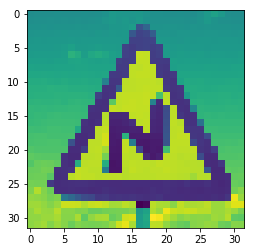

In [113]:
resized_images = np.empty([5, 32, 32, 3])

for i in range(len(images)): 
    pic = images[i]
    resized_images[i] = resize(images[i])
    
    
images_gray = grayscale_cv(resized_images)
plt.imshow(images_gray[2][:,:,0])
y_out = [3, 4, 21, 22, 39]





### Predict the Sign Type for Each Image

In [88]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [114]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.



with tf.Session() as sess_gray:
    saver.restore(sess_gray, tf.train.latest_checkpoint('.'))
    image_test_accuracy = evaluate(images_gray, y_out)
    print("Test Accuracy = {:.3f}".format(image_test_accuracy))

    


INFO:tensorflow:Restoring parameters from ./lenet_gray
Test Accuracy = 0.600


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [78]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
#Features and Labels
x_softmax = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], 1))
y_softmax = tf.placeholder(tf.int64, (None))
one_hot_y_images = tf.one_hot(5, n_classes)

In [115]:

softmax_prob = tf.nn.softmax(logits)
top_prob = tf.nn.top_k(softmax_prob, k=5)


with tf.Session() as sess_gray:
    saver.restore(sess_gray, tf.train.latest_checkpoint('.'))
    print(sess_gray.run(top_prob, feed_dict={x:images_gray}))
    
    
    

INFO:tensorflow:Restoring parameters from ./lenet_gray
TopKV2(values=array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [6.4445335e-01, 2.1798882e-01, 1.3559316e-01, 1.9229796e-03,
        2.9441499e-05],
       [9.9981636e-01, 1.8349597e-04, 1.6114868e-07, 1.8439244e-22,
        7.1082734e-26],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 6.1429421e-15, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00]], dtype=float32), indices=array([[ 3,  0,  1,  2,  4],
       [ 1, 26, 27,  0, 18],
       [18, 11, 23, 30, 28],
       [22,  0,  1,  2,  3],
       [39, 33,  0,  1,  2]], dtype=int32))


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")